In [2]:
import sys
import os
import json
import numpy as np
import pandas as pd
sys.path.insert(0, os.path.abspath("../optimizer/"))
import single_node_profiles_cpp as snp
import utils
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
profs = snp.load_single_node_profiles(
        single_node_profs_dir=os.path.abspath("../results_cpp_benchmarker/contention_sweep"),
        models="all")
idx = 0

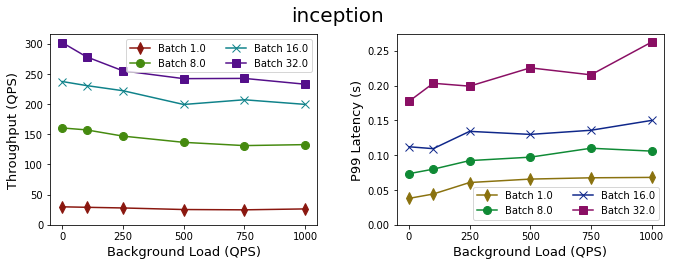

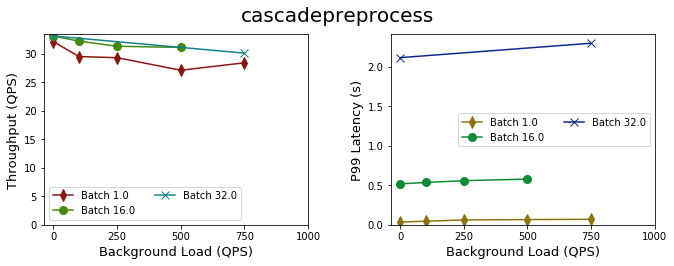

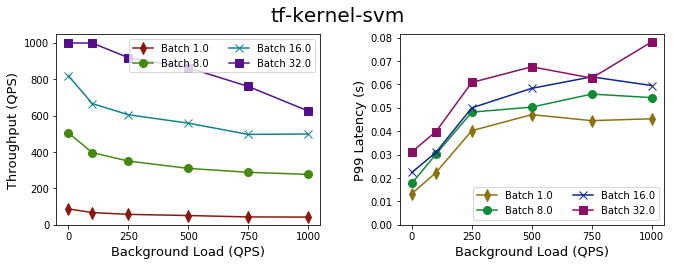

In [65]:
chosen = sns.hls_palette(8, l=.3, s=.8)

for model, p in profs.items():
    fig, (ax_thru, ax_lat) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    p = p.sort_values(["contention", "mean_batch_size"])
    cmap = iter(chosen)
    markers = iter(['d', 'o', 'x', 's'])
    for b, g in p.groupby("mean_batch_size"):
        if b in [1, 8, 16, 32]:
            color = cmap.next()
            marker = markers.next()
            ax_thru.plot(g.contention, g.thru_stage_mean_throughput_qps, ms=8, marker=marker, label="Batch {}".format(b), color=color)
            color = cmap.next()
            ax_lat.plot(g.contention, g.p99_latency, marker=marker, ms=8, label="Batch {}".format(b), color=color)
            

    ax_thru.set_xlabel("Background Load (QPS)", fontsize=13)
    ax_thru.set_ylabel("Throughput (QPS)", fontsize=13)
    ax_thru.set_ylim(bottom=0)
    ax_lat.set_ylim(bottom=0)
    ax_lat.set_xlabel("Background Load (QPS)", fontsize=13)
    ax_lat.set_ylabel("P99 Latency (s)", fontsize=13)
    ax_lat.xaxis.set_ticks(np.arange(0, 1001, 250))
    ax_thru.xaxis.set_ticks(np.arange(0, 1001, 250))

    ax_thru.legend(ncol=2, loc=0)
    ax_lat.legend(ncol=2, loc=0)
    fig.suptitle(model, fontsize=20)
    plt.tight_layout(pad=3)
    base_dir = "contention_sweep"
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)

    plt.savefig(os.path.join(base_dir, "{}.pdf".format(model)))

    idx += 1